<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_15_Matplotlib Scatter Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\alexm\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 🟨 Median Yearly Salary vs. Job Count (2.15.1)

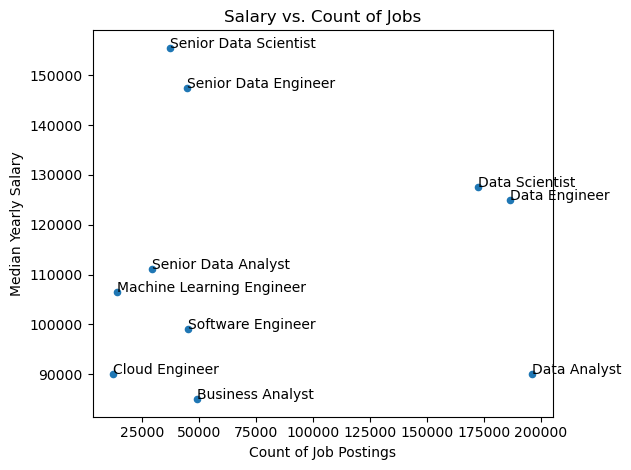

In [14]:
grouped = df.groupby('job_title_short').agg(
    median_salary=('salary_year_avg', 'median'),
    job_count=('job_title_short', 'count')).dropna()

grouped = grouped.sort_values(by='job_count', ascending=False)

grouped.plot(kind='scatter', x='job_count', y='median_salary')

for i, txt in enumerate(grouped.index):
    plt.text(grouped['job_count'].iloc[i], grouped['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Jobs')
plt.tight_layout()
plt.show()

---

## 🟨 Top 7 Countries by Median Yearly Salary vs Job Count  (2.15.2)

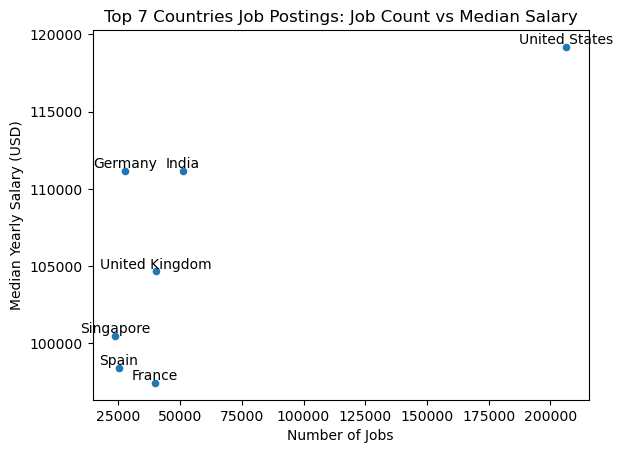

In [21]:
country_stats = df.groupby('job_country').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
   job_count = top_countries['job_count'].iloc[i]
   mean_salary = top_countries['median_salary_year_avg'].iloc[i]
   country = top_countries.index[i]
   plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()



---

## 🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3)

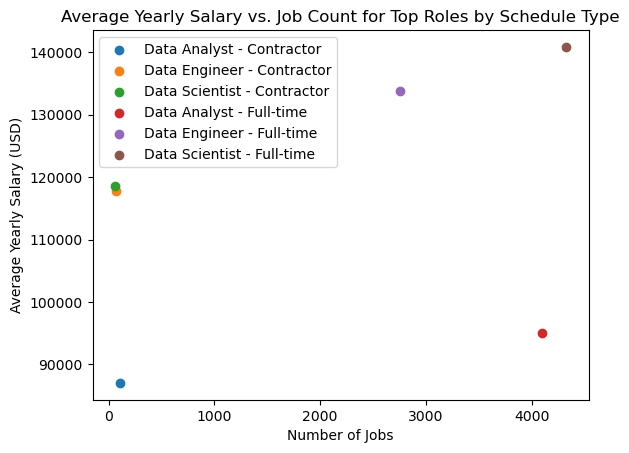

In [39]:
# Code Needed
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()

---

In [42]:
from adjustText import adjust_text 